<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Packt/blob/main/StableDiffusionChapter16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Apr 15 12:45:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 951.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.

In [3]:
!pip install transformers

In [4]:
from diffusers import AutoencoderKL

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
vae_model = AutoencoderKL.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0"
    , subfolder = "vae"
).to("cuda:0")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [6]:
import torch

In [8]:
from diffusers.utils import load_image
from diffusers.image_processor import VaeImageProcessor
image = load_image("/content/Cat1.png")

image_processor = VaeImageProcessor()
prep_image = image_processor.preprocess(image)
prep_image = prep_image.to("cuda:0")

with torch.no_grad():
    image_latent = vae_model.encode(prep_image).latent_dist.sample()

image_latent.shape

torch.Size([1, 4, 128, 96])

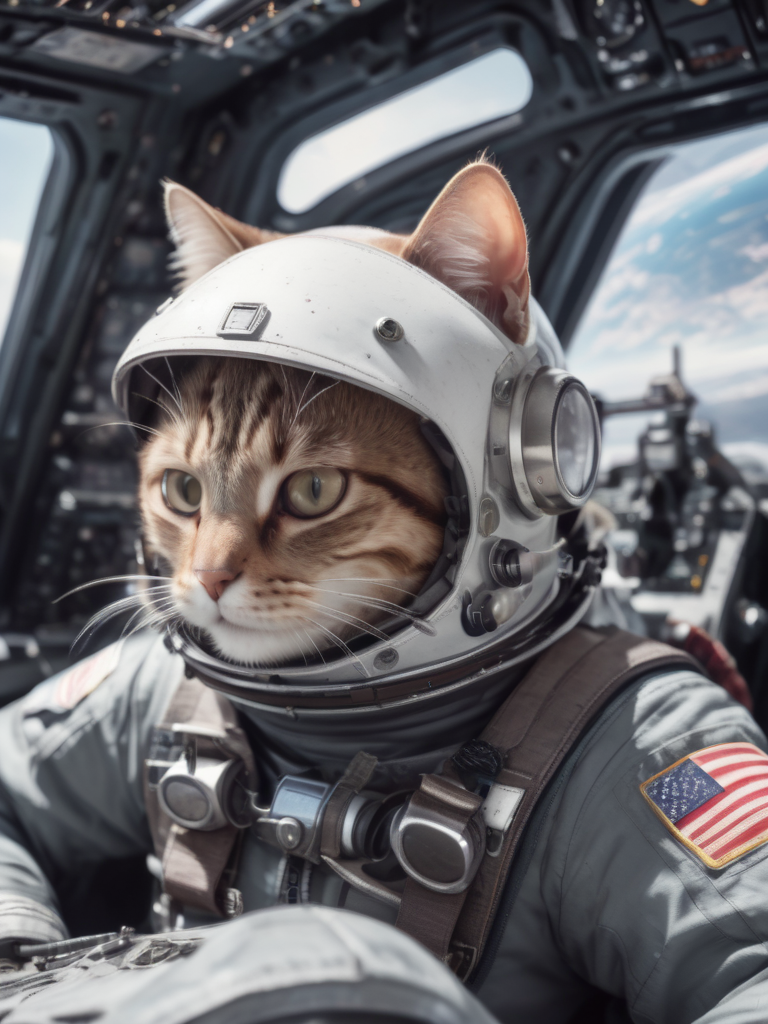

In [9]:
with torch.no_grad():
    decode_image = vae_model.decode(
        image_latent
        , return_dict = False
    )[0]

image = image_processor.postprocess(image = decode_image)[0]
image

In [10]:
input_prompt = "a running dog"

from transformers import CLIPTokenizer,CLIPTextModel
import torch

# initialize tokenizer 1
clip_tokenizer = CLIPTokenizer.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0"
    , subfolder = "tokenizer"
    , dtype = torch.float16
)

input_tokens = clip_tokenizer(
    input_prompt
    , return_tensors="pt"
)["input_ids"]
print(input_tokens)

clip_tokenizer_2 = CLIPTokenizer.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0"
    , subfolder = "tokenizer_2"
    , dtype = torch.float16
)

input_tokens_2 = clip_tokenizer_2(
    input_prompt
    , return_tensors="pt"
)["input_ids"]

print(input_tokens_2)

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tensor([[49406,   320,  2761,  1929, 49407]])


tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tensor([[49406,   320,  2761,  1929, 49407]])


In [11]:
clip_text_encoder = CLIPTextModel.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0"
    , subfolder = "text_encoder"
    , torch_dtype =torch.float16
).to("cuda")

# encode token ids to embeddings
with torch.no_grad():
    prompt_embeds = clip_text_encoder(
        input_tokens.to("cuda")
    )[0]

print(prompt_embeds.shape)

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

torch.Size([1, 5, 768])


In [12]:
clip_text_encoder_2 = CLIPTextModel.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0"
    , subfolder = "text_encoder_2"
    , torch_dtype =torch.float16
).to("cuda")

# encode token ids to embeddings
with torch.no_grad():
    prompt_embeds_2 = clip_text_encoder_2(input_tokens.to("cuda"))[0]

print(prompt_embeds_2.shape)

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

torch.Size([1, 5, 1280])


In [13]:
from transformers import CLIPTextModelWithProjection
clip_text_encoder_2 = CLIPTextModelWithProjection.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0"
    , subfolder = "text_encoder_2"
    , torch_dtype =torch.float16
).to("cuda")

# encode token ids to embeddings
with torch.no_grad():
    pool_embed = clip_text_encoder_2(input_tokens.to("cuda"))[0]

print(pool_embed.shape)

torch.Size([1, 1280])


In [14]:
import torch
from diffusers import StableDiffusionXLPipeline
sdxl_pipe = StableDiffusionXLPipeline.from_pretrained(
    "RunDiffusion/RunDiffusion-XL-Beta"
    , torch_dtype = torch.float16
)
sdxl_pipe.watermark = None

model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

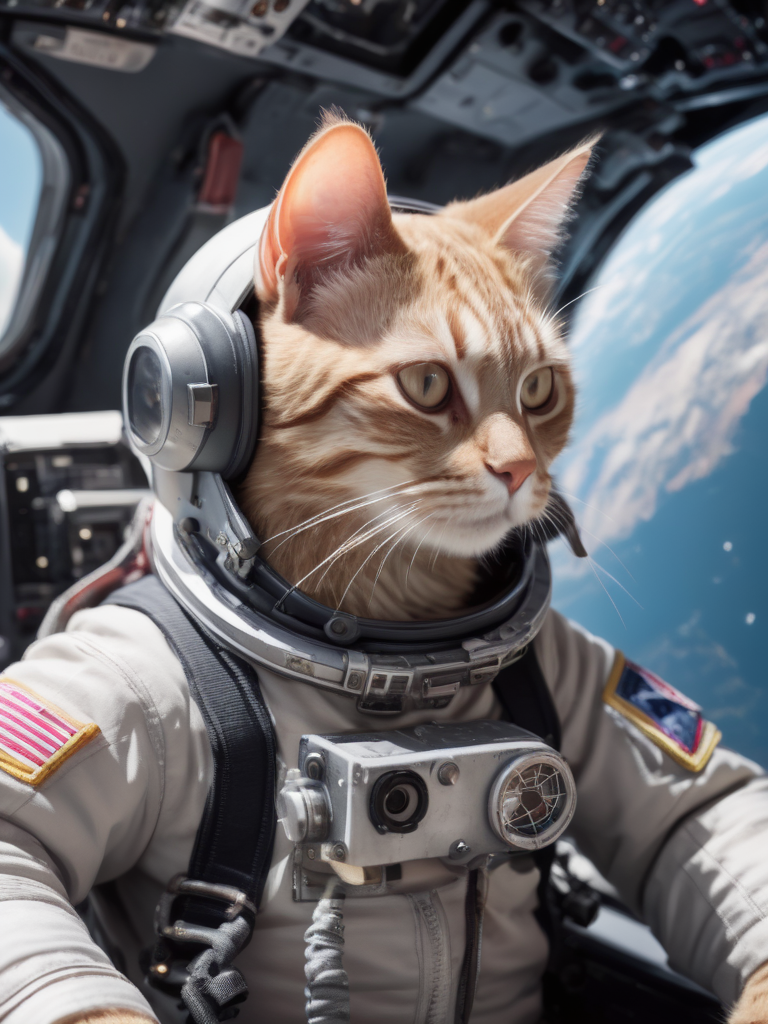

In [15]:
prompt = "realistic photo of astronaut cat in fighter cockpit, detailed, 8k"

sdxl_pipe.to("cuda")
image = sdxl_pipe(
    prompt                  = prompt
    , width                 = 768
    , height                = 1024
    , generator             = torch.Generator("cuda").manual_seed(1)
).images[0]

sdxl_pipe.to("cpu")
torch.cuda.empty_cache()
image

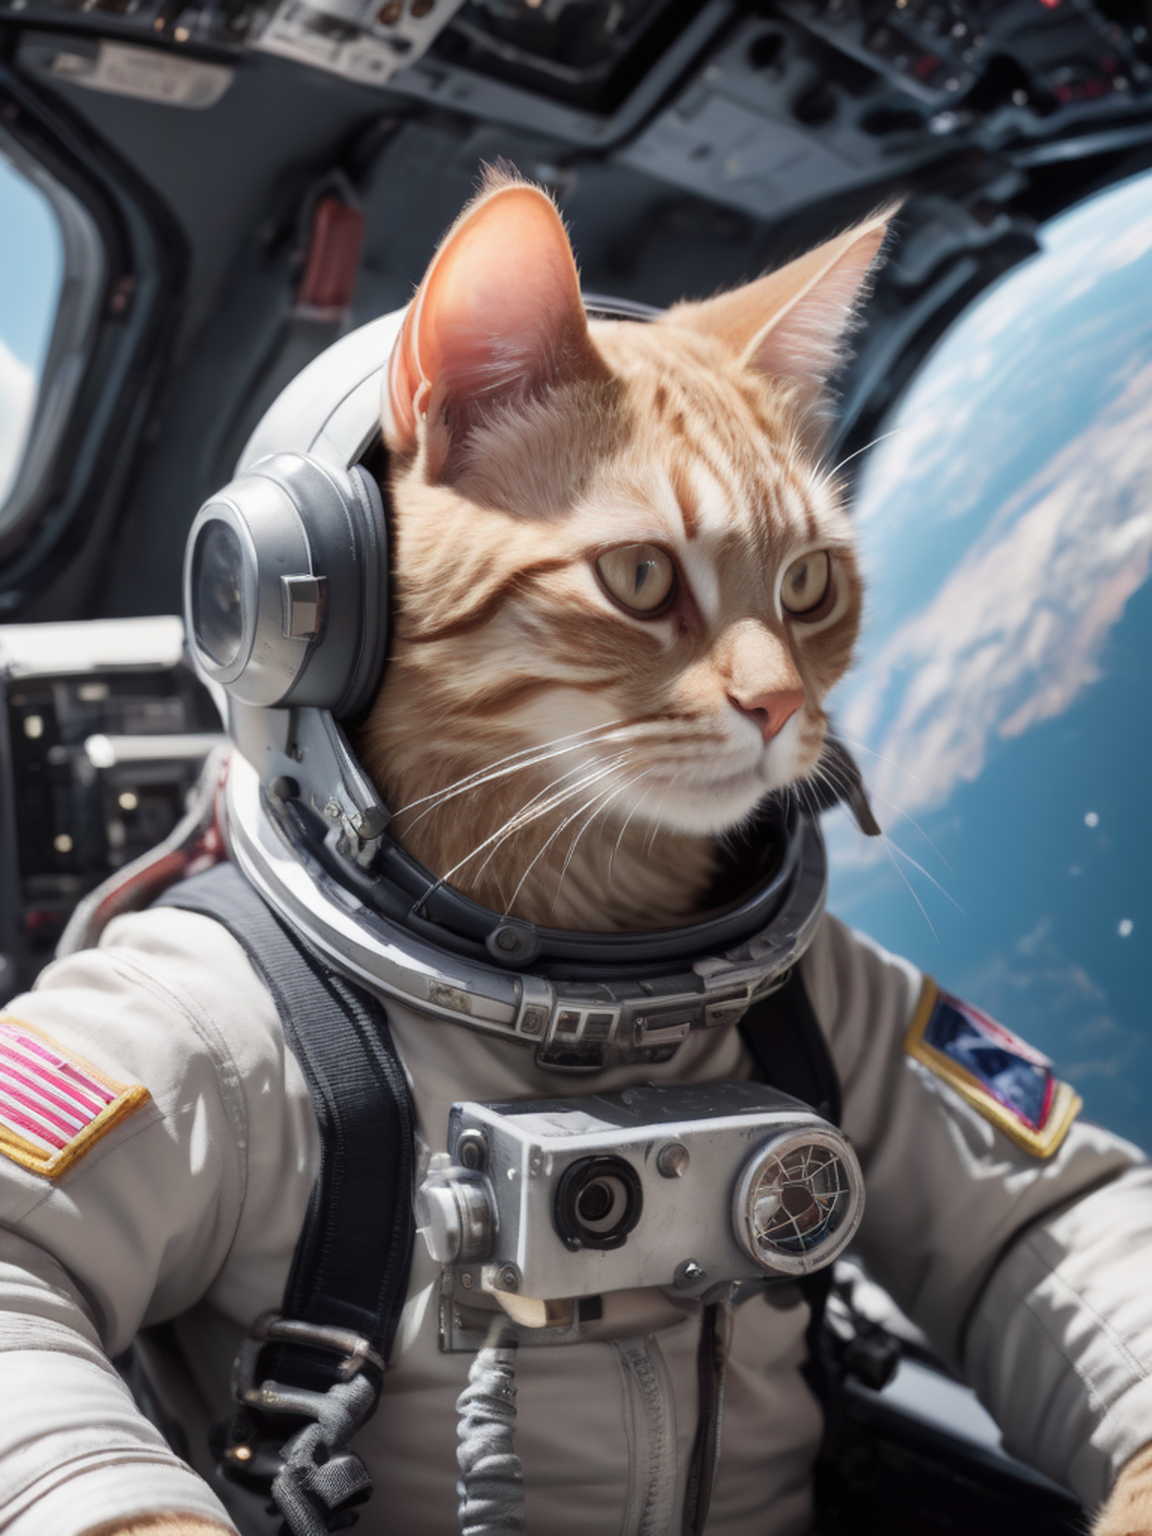

In [16]:
from diffusers.image_processor import VaeImageProcessor
img_processor = VaeImageProcessor()

# get the size of the image
(width, height) = image.size

# upscale image
image_x = img_processor.resize(
    image = image
    , width = int(width * 1.5)
    , height = int(height * 1.5)
)
image_x

In [17]:
from diffusers import StableDiffusionXLImg2ImgPipeline
img2img_pipe = StableDiffusionXLImg2ImgPipeline(
    vae                 = sdxl_pipe.vae
    , text_encoder      = sdxl_pipe.text_encoder
    , text_encoder_2    = sdxl_pipe.text_encoder_2
    , tokenizer         = sdxl_pipe.tokenizer
    , tokenizer_2       = sdxl_pipe.tokenizer_2
    , unet              = sdxl_pipe.unet
    , scheduler         = sdxl_pipe.scheduler
    , add_watermarker   = None
)
img2img_pipe.watermark = None

  0%|          | 0/9 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, du

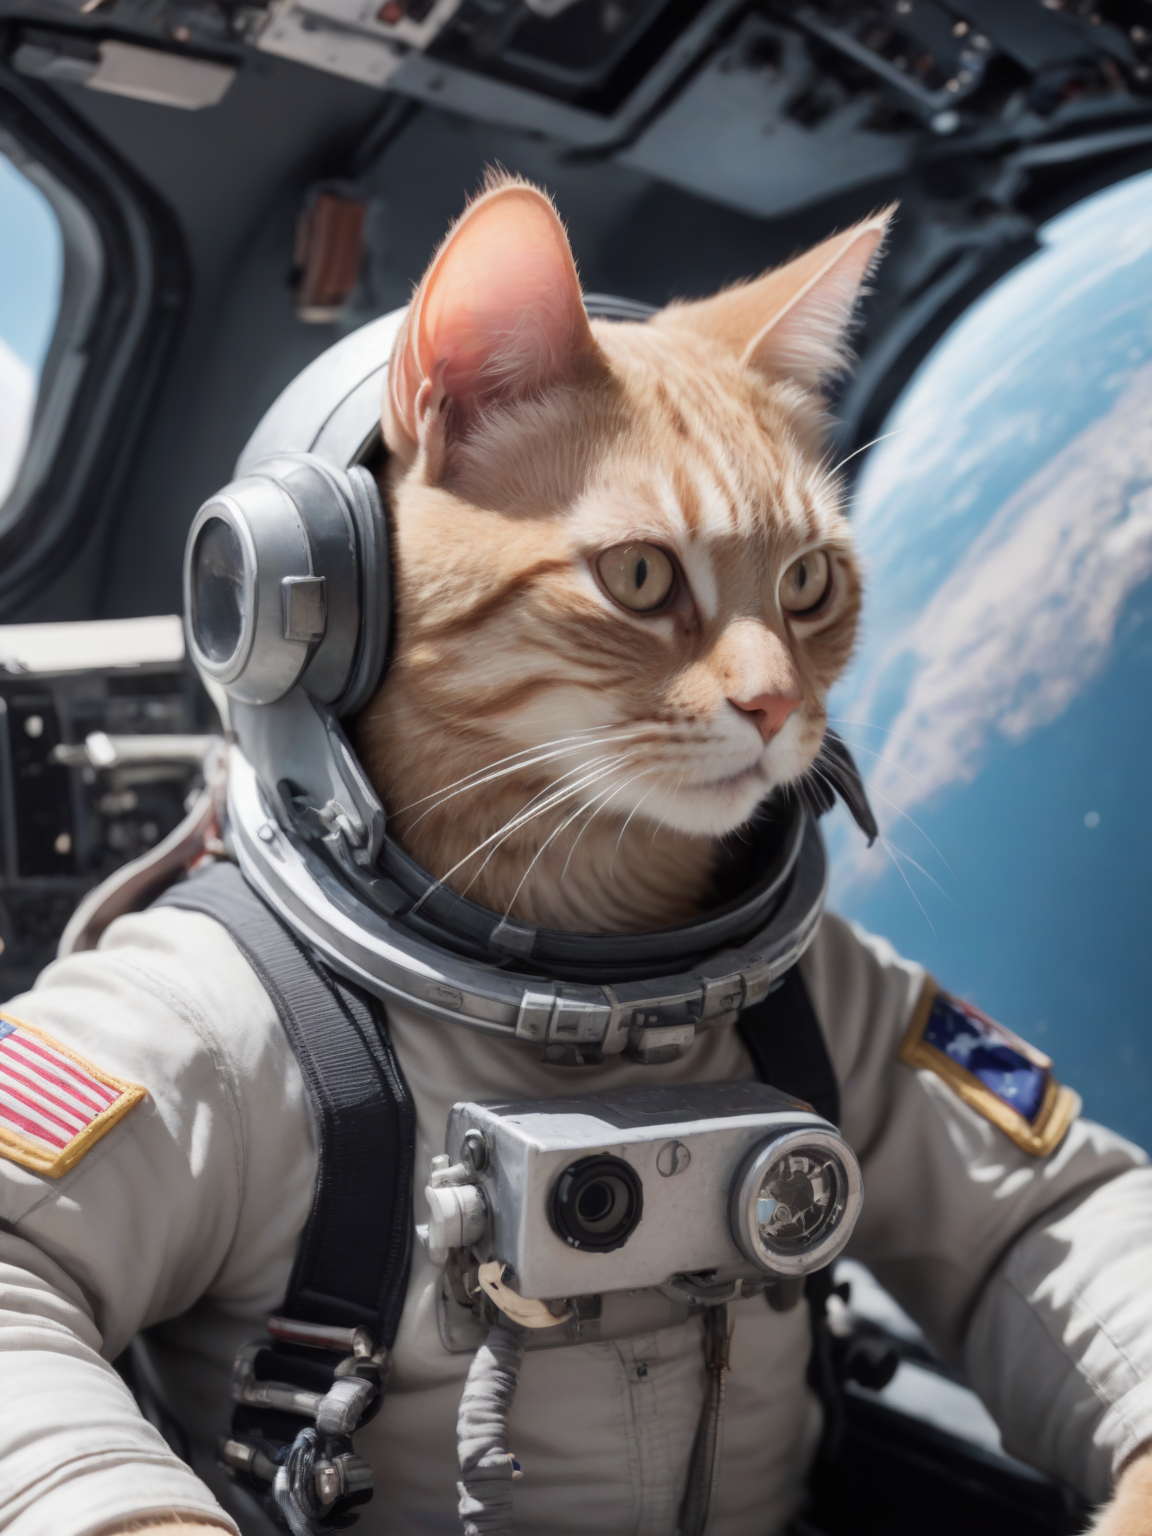

In [18]:
img2img_pipe.to("cuda")
refine_image_2x = img2img_pipe(
    image                 = image_x
    , prompt              = prompt
    , strength            = 0.3
    , num_inference_steps = 30
    , guidance_scale      = 4.0
).images[0]

img2img_pipe.to("cpu")
torch.cuda.empty_cache()
refine_image_2x

In [20]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "RunDiffusion/RunDiffusion-XL-Beta"
    , torch_dtype       = torch.float16
    , use_safetensors   = True
    , variant           = "fp16"
    , custom_pipeline   = "lpw_stable_diffusion_xl",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


(…)les/community/lpw_stable_diffusion_xl.py:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = """
glamour photography, (full body:1.5) photo of young man,
white blank background,
wear sweater, with scarf,
wear jean pant,
wear nike run shoes,
wear sun glass,
wear leather shoes,
holding a umbrella in hand
""" * 2

prompt = prompt + " a (cute cat:1.5) aside"

neg_prompt = """
(worst quality:1.5),(low quality:1.5), paint, cg, spots, bad hands,
three hands, noise, blur
"""

pipe.to("cuda")
image = pipe(
    prompt                  = prompt
    , negative_prompt       = neg_prompt
    , width                 = 832
    , height                = 1216
    , generator             = torch.Generator("cuda").manual_seed(7)
).images[0]

pipe.to("cpu")
torch.cuda.empty_cache()
image

  0%|          | 0/50 [00:00<?, ?it/s]

Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
